<a href="https://colab.research.google.com/github/next-in-cmd/Air-Quality-Forecasting-ML-Model/blob/main/Air_Quality_Forecasting_Using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies

In [1]:
import numpy as np
import pandas as pd

Data Collection & Processing

In [3]:
#Loading data from csv file to pandas dataframe
air_data_quality = pd.read_csv('/content/AirQualityUCI.csv')

In [4]:
air_data_quality.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [5]:
# Removing Last 2 columns
air_data_quality = air_data_quality.iloc[: ,:-2]

In [6]:
air_data_quality.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [7]:
air_data_quality.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
air_data_quality.shape

(9471, 15)

In [9]:
air_data_quality.loc[[9357]]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


9365 is the last data point in the dataframe & remaining rows are just null values.
index = 9356
row = 9357th row & Above are null values

Take the 9357 row alone from dataframe

In [10]:
air_data_quality = air_data_quality.head(9357)

In [11]:
air_data_quality.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [12]:
air_data_quality.shape

(9357, 15)

In [13]:
air_data_quality.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04-04-2005,10:00:00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04-04-2005,11:00:00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04-04-2005,12:00:00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04-04-2005,13:00:00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04-04-2005,14:00:00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [14]:
air_data_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [15]:
air_data_quality.isnull().sum()

,0
Date,0
Time,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0


This shows that it does not contain missing values in dataset. But Actually it contains missing values in the form of tagged value"-200".
This is describe in the UCI repository documentation.

In [16]:
air_data_quality.isin([-200]).sum(axis=0)

,0
Date,0
Time,0
CO(GT),1683
PT08.S1(CO),366
NMHC(GT),8443
C6H6(GT),366
PT08.S2(NMHC),366
NOx(GT),1639
PT08.S3(NOx),366
NO2(GT),1642


**Handling Missing values**

convert all -200 values to NaN values with mean of that specific columns

In [17]:
air_data_quality = air_data_quality.replace(to_replace=-200, value = np.NaN)

In [18]:
air_data_quality.isnull().sum()

,0
Date,0
Time,0
CO(GT),1683
PT08.S1(CO),366
NMHC(GT),8443
C6H6(GT),366
PT08.S2(NMHC),366
NOx(GT),1639
PT08.S3(NOx),366
NO2(GT),1642


This shows the actual missing values

In [19]:
air_data_quality.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04-04-2005,10:00:00,3.1,1314.0,NaN,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04-04-2005,11:00:00,2.4,1163.0,NaN,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04-04-2005,12:00:00,2.4,1142.0,NaN,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04-04-2005,13:00:00,2.1,1003.0,NaN,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04-04-2005,14:00:00,2.2,1071.0,NaN,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [20]:
import pandas as pd
import numpy as np

# Assuming 'air_data_quality' is your DataFrame
# Select only numeric columns for calculating the mean
numeric_columns = air_data_quality.select_dtypes(include=np.number)
means = numeric_columns.mean()
print(means)

CO(GT)              2.152750
PT08.S1(CO)      1099.833166
NMHC(GT)          218.811816
C6H6(GT)           10.083105
PT08.S2(NMHC)     939.153376
NOx(GT)           246.896735
PT08.S3(NOx)      835.493605
NO2(GT)           113.091251
PT08.S4(NO2)     1456.264598
PT08.S5(O3)      1022.906128
T                  18.317829
RH                 49.234201
AH                  1.025530
dtype: float64


In [21]:
import pandas as pd
import numpy as np

# Assuming 'air_data_quality' is your DataFrame

# Select only numeric columns for calculating the mean
numeric_columns = air_data_quality.select_dtypes(include=np.number)

# Calculate the mean for numeric columns only
means = numeric_columns.mean()

# Fill missing values in numeric columns with their respective means
air_data_quality[numeric_columns.columns] = air_data_quality[numeric_columns.columns].fillna(means)

print(air_data_quality) # Check the DataFrame after filling missing values


            Date      Time  CO(GT)  PT08.S1(CO)    NMHC(GT)  C6H6(GT)  \
0     10-03-2004  18:00:00     2.6       1360.0  150.000000      11.9   
1     10-03-2004  19:00:00     2.0       1292.0  112.000000       9.4   
2     10-03-2004  20:00:00     2.2       1402.0   88.000000       9.0   
3     10-03-2004  21:00:00     2.2       1376.0   80.000000       9.2   
4     10-03-2004  22:00:00     1.6       1272.0   51.000000       6.5   
...          ...       ...     ...          ...         ...       ...   
9352  04-04-2005  10:00:00     3.1       1314.0  218.811816      13.5   
9353  04-04-2005  11:00:00     2.4       1163.0  218.811816      11.4   
9354  04-04-2005  12:00:00     2.4       1142.0  218.811816      12.4   
9355  04-04-2005  13:00:00     2.1       1003.0  218.811816       9.5   
9356  04-04-2005  14:00:00     2.2       1071.0  218.811816      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0   

In [22]:
air_data_quality.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04-04-2005,10:00:00,3.1,1314.0,218.811816,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04-04-2005,11:00:00,2.4,1163.0,218.811816,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04-04-2005,12:00:00,2.4,1142.0,218.811816,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04-04-2005,13:00:00,2.1,1003.0,218.811816,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04-04-2005,14:00:00,2.2,1071.0,218.811816,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [23]:
air_data_quality.isnull().sum()

,0
Date,0
Time,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0


Two task can be performed on this dataset

1. Forecasting
2. Regression

**Forecasating with FB prophet Algorithm**

In [24]:
# Converting the Date From DD-MM-YYYY to YYYY-MM-DD

date_info = pd.to_datetime(air_data_quality['Date'], format='%d-%m-%Y')

print(date_info)

0      2004-03-10
1      2004-03-10
2      2004-03-10
3      2004-03-10
4      2004-03-10
          ...    
9352   2005-04-04
9353   2005-04-04
9354   2005-04-04
9355   2005-04-04
9356   2005-04-04
Name: Date, Length: 9357, dtype: datetime64[ns]


In [25]:
time_info = air_data_quality['Time']

In [26]:
print(time_info)

0       18:00:00
1       19:00:00
2       20:00:00
3       21:00:00
4       22:00:00
          ...   
9352    10:00:00
9353    11:00:00
9354    12:00:00
9355    13:00:00
9356    14:00:00
Name: Time, Length: 9357, dtype: object


In [27]:
time_info = time_info.apply(lambda x:x.replace('.', ':'))

In [28]:
print(time_info)

0       18:00:00
1       19:00:00
2       20:00:00
3       21:00:00
4       22:00:00
          ...   
9352    10:00:00
9353    11:00:00
9354    12:00:00
9355    13:00:00
9356    14:00:00
Name: Time, Length: 9357, dtype: object


In [29]:
print(type(date_info))
print(type(time_info))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [30]:
# combining 2 series to pandas dataframe
date_time = pd.concat([date_info, time_info], axis=1)

In [31]:
date_time.head()

,Date,Time
0,2004-03-10,18:00:00
1,2004-03-10,19:00:00
2,2004-03-10,20:00:00
3,2004-03-10,21:00:00
4,2004-03-10,22:00:00


In [32]:
date_time.shape

(9357, 2)

In [33]:
# combining date and time
date_time['ds'] = date_time['Date'].astype(str)+''+date_time['Time'].astype(str)

In [34]:
date_time.head()

,Date,Time,ds
0,2004-03-10,18:00:00,2004-03-1018:00:00
1,2004-03-10,19:00:00,2004-03-1019:00:00
2,2004-03-10,20:00:00,2004-03-1020:00:00
3,2004-03-10,21:00:00,2004-03-1021:00:00
4,2004-03-10,22:00:00,2004-03-1022:00:00


In [35]:
date_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9357 non-null   datetime64[ns]
 1   Time    9357 non-null   object        
 2   ds      9357 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 219.4+ KB


We have to convert ds from datatype to date time format

In [36]:
data = pd.DataFrame()

In [37]:
data['ds'] = pd.to_datetime(date_time['ds'], format='%Y-%m-%d%H:%M:%S')

In [38]:
data.head()

,ds
0,2004-03-10 18:00:00
1,2004-03-10 19:00:00
2,2004-03-10 20:00:00
3,2004-03-10 21:00:00
4,2004-03-10 22:00:00


In [39]:
data['y'] = air_data_quality['RH']

In [40]:
data.head()

,ds,y
0,2004-03-10 18:00:00,48.9
1,2004-03-10 19:00:00,47.7
2,2004-03-10 20:00:00,54.0
3,2004-03-10 21:00:00,60.0
4,2004-03-10 22:00:00,59.6


In [41]:
! pip install prophet

In [42]:
from prophet import Prophet

In [43]:
# Training Prophet Model

model = Prophet()
model.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzphki3f/laxco9hb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzphki3f/e6ff0ryz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30126', 'data', 'file=/tmp/tmpjzphki3f/laxco9hb.json', 'init=/tmp/tmpjzphki3f/e6ff0ryz.json', 'output', 'file=/tmp/tmpjzphki3f/prophet_modelmv6zsfed/prophet_model-20240804103204.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:32:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:32:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [44]:
future = model.make_future_dataframe(periods=365, freq='H')
future.tail()

,ds
9717,2005-04-19 15:00:00
9718,2005-04-19 16:00:00
9719,2005-04-19 17:00:00
9720,2005-04-19 18:00:00
9721,2005-04-19 19:00:00


In [46]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
9717,2005-04-19 15:00:00,33.494204,18.046447,48.069064
9718,2005-04-19 16:00:00,33.977616,17.769915,49.244928
9719,2005-04-19 17:00:00,35.610862,19.278330,51.214603
9720,2005-04-19 18:00:00,38.506470,22.443553,53.585095
9721,2005-04-19 19:00:00,42.060689,26.689865,58.573540


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


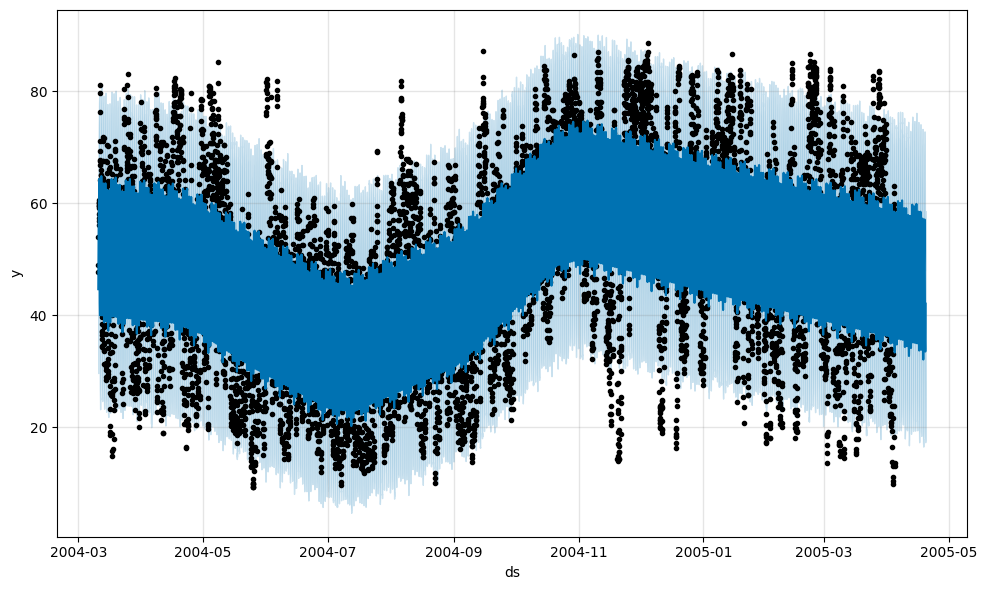

In [47]:
fig1 = model.plot(forecast)

Training ML Model

Logistic Regression

In [60]:
# seperating the data and label
# seperating the data and label
# seperating the data and label
# seperating the data and label
# Assuming your date and time are in separate columns 'Date' and 'Time'
# Combine them into a single datetime column
air_data_quality['ds'] = pd.to_datetime(air_data_quality['Date'] + ' ' + air_data_quality['Time'], format='%d-%m-%Y %H:%M:%S') # Updated format string to match the date format in the error message

# Now you can extract the values
X = air_data_quality['ds'].values
# Check the column names in your DataFrame to find the correct label column
print(air_data_quality.columns)
# Replace 'Correct_Label_Column' with the actual name of the column containing your labels
Y = air_data_quality['RH'].values # Replace 'CO(GT)' with the correct column name


Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'ds'],
      dtype='object')


In [61]:
print(X)

['2004-03-10T18:00:00.000000000' '2004-03-10T19:00:00.000000000'
 '2004-03-10T20:00:00.000000000' ... '2005-04-04T12:00:00.000000000'
 '2005-04-04T13:00:00.000000000' '2005-04-04T14:00:00.000000000']


In [62]:
print(Y)

[48.9 47.7 54.  ... 18.3 13.5 13.1]


Splitting the data to training and test data

In [65]:
# Import the necessary module
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# Remove the 'stratify' parameter since it's causing issues with your data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [66]:
print(X.shape, X_train.shape, X_test.shape)

(9357,) (7485,) (1872,)


In [67]:
print(X_train)

['2004-09-19T05:00:00.000000000' '2004-05-28T06:00:00.000000000'
 '2005-02-01T17:00:00.000000000' ... '2004-12-12T07:00:00.000000000'
 '2004-06-26T01:00:00.000000000' '2005-01-10T10:00:00.000000000']


In [68]:
print(X_test)

['2004-10-20T23:00:00.000000000' '2004-08-07T17:00:00.000000000'
 '2004-09-23T20:00:00.000000000' ... '2004-08-01T09:00:00.000000000'
 '2004-10-16T12:00:00.000000000' '2004-08-23T01:00:00.000000000']


In [49]:
!pip install scikit-learn
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

In [71]:
from sklearn.linear_model import LinearRegression  # Import a regression model

# ... (rest of your code)

model = LinearRegression()  # Use a regression model instead of LogisticRegression
X_train = X_train.reshape(-1, 1)  # Reshape X_train to be 2D
model.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [79]:
# Convert the dates in X_train to numerical representation
# (e.g., number of days since a reference date)
import pandas as pd
from sklearn.metrics import mean_squared_error # Import for regression evaluation

# Assuming X_train is currently a numpy array
X_train_dates = pd.to_datetime(X_train[:, 0]) # Access the first column of the numpy array directly
reference_date = X_train_dates.min()
# Calculate the time difference and extract the number of days
# Use .dt accessor on the DatetimeIndex, then extract days from the TimedeltaIndex
X_train_numeric = (X_train_dates - reference_date).days.values.reshape(-1, 1)

# Now use X_train_numeric for training and prediction
model.fit(X_train_numeric, Y_train)
X_train_prediction = model.predict(X_train_numeric)
training_data_mse = mean_squared_error(Y_train, X_train_prediction) # Use mean squared error for regression
print(training_data_mse)

274.3003317000254


In [80]:
print('Accuracy score on the training data :', training_data_mse)

Accuracy score on the training data : 274.3003317000254


In [82]:
# accuracy score on the testing data
# Convert X_test to numerical representation like you did for X_train
X_test_dates = pd.to_datetime(X_test)
X_test_numeric = (X_test_dates - reference_date).days.values.reshape(-1, 1)

X_test_prediction = model.predict(X_test_numeric) # Use the reshaped X_test

# If this is a regression problem, evaluate using mean squared error
test_data_mse = mean_squared_error(Y_test, X_test_prediction)
print('Mean Squared Error on the testing data:', test_data_mse)

# If this is actually a classification problem,
# you'll need to use a classification model and appropriate metrics

Mean Squared Error on the testing data: 278.5437967079492


Saving the trained model

In [83]:
import pickle

In [84]:
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [92]:
# loading the saved model
loaded_model = pickle.load(open('/content/trained_model.sav', 'rb'))

In [96]:
# Import necessary libraries
import numpy as np
import pandas as pd  # Import pandas for date/time handling

# ... (rest of your code)

# Select a test example, ensuring the index is within the valid range
index = 100  # Choose an index within the bounds of your DataFrame
X_new = X_test.iloc[index]  # Use .iloc for integer-based indexing

# Convert datetime feature to numerical representation (if present)
if isinstance(X_new[0], pd.Timestamp):  # Check if it's a datetime object
    X_new[0] = X_new[0].timestamp()  # Convert to Unix timestamp (seconds since epoch)

# Predict relative humidity
prediction = model.predict([X_new.values])  # Ensure X_new is enclosed in a list or array and convert to numpy array

# ... (rest of your code)
# Print the predicted relative humidity
predicted_humidity = prediction[0]
print("Predicted Relative Humidity:", predicted_humidity)

# Assess air quality
if predicted_humidity < 30:
    air_quality = 'Bad'
    description = 'Low relative humidity, which may indicate dry conditions.'
elif 30 <= predicted_humidity < 60:
    air_quality = 'Good'
    description = 'Moderate relative humidity, which is generally comfortable.'
else:
    air_quality = 'Bad'
    description = 'High relative humidity, which may indicate humid or damp conditions.'

print(f"Air Quality: {air_quality}")
print(description)

Predicted Relative Humidity: 34319115.73063829
Air Quality: Bad
High relative humidity, which may indicate humid or damp conditions.


<ipython-input-96-1fe69d1acd25>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1079074800.0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  X_new[0] = X_new[0].timestamp()  # Convert to Unix timestamp (seconds since epoch)
